In [1]:
import sys
import os
sys.path.append(os.path.abspath("../"))

In [2]:


from src.data_loader import load_data
from src.preprocessing import preprocess_data
from src.feature_engineering import engineer_features
from src.modeling import train_price_model


from src.scoring import (
    customer_fair_price,
    investor_flip_score,
    banker_risk_score
)

from src.visualization import (
    plot_price_distribution,
    plot_price_labels,
    plot_quality_roi,
    plot_investor_residuals,
    plot_neighborhood_analysis
)

In [3]:
# ---------------------------------------------------
# 1. Pipeline: Load → Clean → Feature Engineering
# ---------------------------------------------------

df = load_data("../data/train.csv")  # adjust if needed
df = preprocess_data(df)
df = engineer_features(df)

✅ Successfully loaded: ../data/train.csv


In [4]:
# ---------------------------------------------------
# 2. Model: Train the "Market Brain"
# ---------------------------------------------------

model_artifacts = train_price_model(df)
model = model_artifacts["model"]


In [5]:
# ---------------------------------------------------
# 3. Scoring: Apply Stakeholder POV Logic
# ---------------------------------------------------

df = customer_fair_price(df, model)   # Buyer POV
df = investor_flip_score(df)          # Investor POV
df = banker_risk_score(df)            # Banker POV


📊 Generating Market Perspectives...


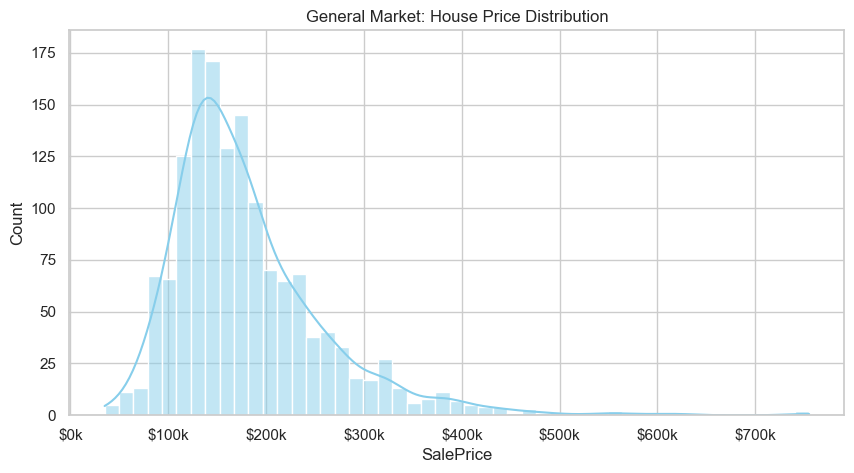

d:\Hosuing_Market_Analysis\src\visualization.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="PriceLabel", palette=palette, order=["Bargain", "Fair", "Overpriced"])


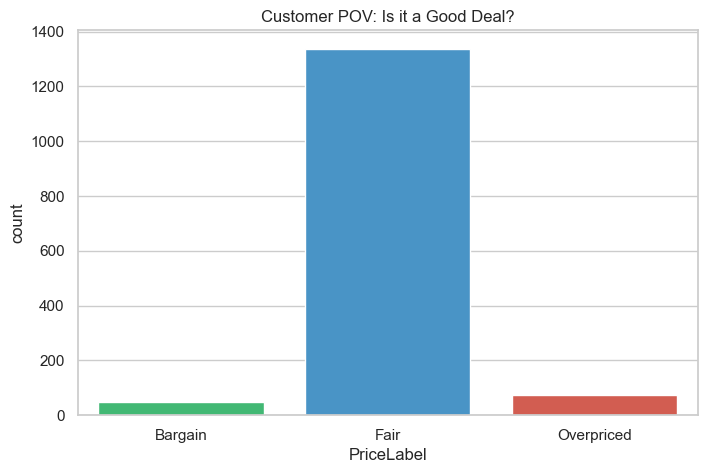

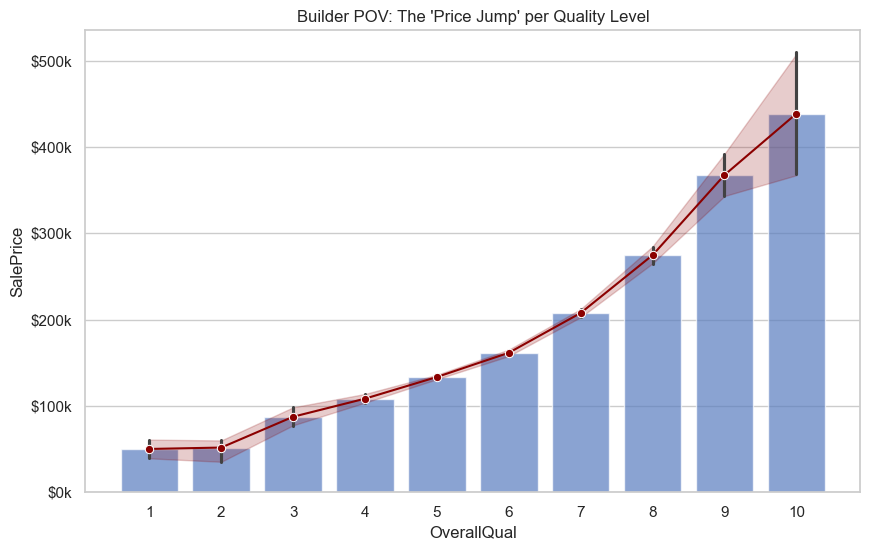

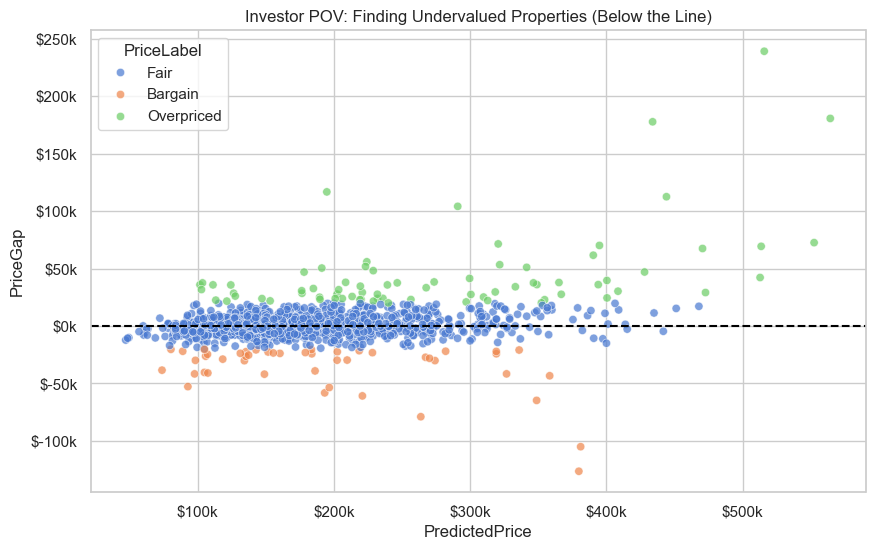

d:\Hosuing_Market_Analysis\src\visualization.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="SalePrice", y="Neighborhood", order=order, palette="Spectral")


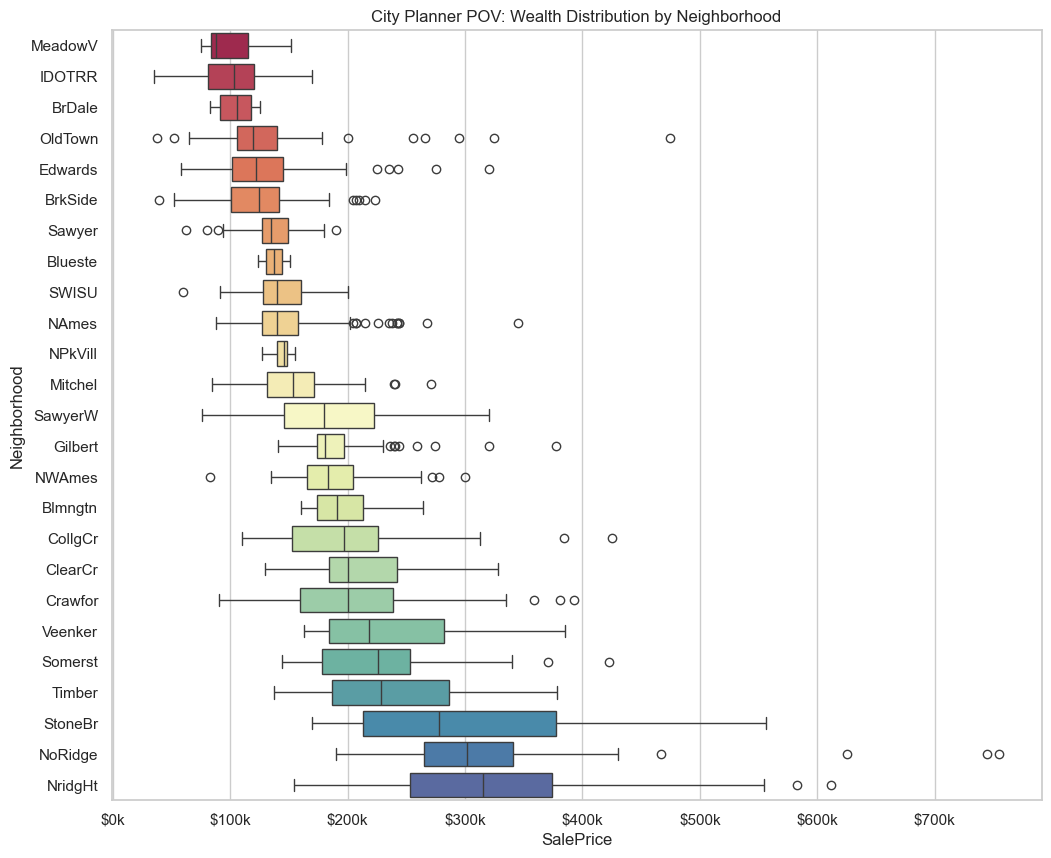

In [6]:
# ---------------------------------------------------
# 4. Visualization: Executive Dashboard
# ---------------------------------------------------

print("📊 Generating Market Perspectives...")

plot_price_distribution(df)      # General Market
plot_price_labels(df)             # Customer POV
plot_quality_roi(df)              # Builder POV
plot_investor_residuals(df)       # Investor POV
plot_neighborhood_analysis(df)    # City Planner POV